In [1]:
# check what results we'd expect if we used a threshold from the quantile
import joblib
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
base_path = "/shares/bulk/oagba/data/output_basic_15k/symptoms/csv/parsed/learning/rf/"
nb_base_path = "/shares/bulk/oagba/data/output_basic_15k/symptoms/csv/parsed/learning/nb/"
mlp_base_path = "/home/oagba/bulk/dl_eval/conf/"

In [3]:
rf_top_1_file = os.path.join(base_path, "random_forest_confidence_matrix_1.joblib")
nb_top_1_file = os.path.join(nb_base_path, "naive_bayes_confidence_matrix_1.joblib")
mlp_top_1_file = os.path.join(mlp_base_path, "mlp_confidence_matrix_1.joblib")

In [4]:
rf_top_5_file = os.path.join(base_path, "random_forest_confidence_matrix_5.joblib")
nb_top_5_file = os.path.join(nb_base_path, "naive_bayes_confidence_matrix_5.joblib")
mlp_top_5_file = os.path.join(mlp_base_path, "mlp_confidence_matrix_5.joblib")

In [5]:
rf_top_0_file = os.path.join(base_path, "random_forest_confidence_matrix_0.joblib")
nb_top_0_file = os.path.join(nb_base_path, "naive_bayes_confidence_matrix_0.joblib")
mlp_top_0_file = os.path.join(mlp_base_path, "mlp_confidence_matrix_0.joblib")

In [6]:
rf_top_n5_file = os.path.join(base_path, "random_forest_confidence_matrix_n5.joblib")
nb_top_n5_file = os.path.join(nb_base_path, "naive_bayes_confidence_matrix_n5.joblib")
mlp_top_n5_file = os.path.join(mlp_base_path, "mlp_confidence_matrix_n5.joblib")

In [7]:
rf_top_1 = joblib.load(rf_top_1_file)
nb_top_1 = joblib.load(nb_top_1_file)
mlp_top_1 = joblib.load(mlp_top_1_file)

In [8]:
rf_top_5 = joblib.load(rf_top_5_file)
nb_top_5 = joblib.load(nb_top_5_file)
mlp_top_5 = joblib.load(mlp_top_5_file)

In [9]:
rf_top_0 = joblib.load(rf_top_0_file)
nb_top_0 = joblib.load(nb_top_0_file)
mlp_top_0 = joblib.load(mlp_top_0_file)

In [10]:
rf_top_n5 = joblib.load(rf_top_n5_file)
nb_top_n5 = joblib.load(nb_top_n5_file)
mlp_top_n5 = joblib.load(mlp_top_n5_file).numpy()

In [11]:
rf_t1_acc = rf_top_1[:, 0]
nb_t1_acc = nb_top_1[:, 0]
mlp_t1_acc = mlp_top_1[:, 0]

In [12]:
rf_t5_acc = rf_top_5[:, 0]
nb_t5_acc = nb_top_5[:, 0]
mlp_t5_acc = mlp_top_5[:, 0]

In [13]:
rf_t0_acc = rf_top_0[:, 0]
nb_t0_acc = nb_top_0[:, 0]
mlp_t0_acc = mlp_top_0[:, 0]

In [14]:
rf_tn5_acc = rf_top_n5[:, 0]
nb_tn5_acc = nb_top_n5[:, 0]
mlp_tn5_acc = mlp_top_n5[:, 0]

In [15]:
mlps = [mlp_t1_acc, mlp_t5_acc, mlp_t0_acc, mlp_tn5_acc]
rfs = [rf_t1_acc, rf_t5_acc, rf_t0_acc, rf_tn5_acc]
nbs = [nb_t1_acc, nb_t5_acc, nb_t0_acc, nb_tn5_acc]

In [16]:
# we need to get the quantiles, and then the mean, add mean after median
quantiles = np.arange(0, 1.1, 0.25)

In [17]:
mlp_data = [np.quantile(item, quantiles) for item in mlps]

In [18]:
rf_data = [np.quantile(item, quantiles) for item in rfs]

In [19]:
nb_data = [np.quantile(item, quantiles) for item in nbs]

In [20]:
mlp_means = [np.mean(item) for item in mlps]
rf_means = [np.mean(item) for item in rfs]
nb_means = [np.mean(item) for item in nbs]

In [21]:
data = {
    "mlp": {
        "quantiles":  mlp_data,
        "means": mlp_means
    },
    "rf": {
        "quantiles":  rf_data,
        "means": rf_means
    },
    "nb": {
        "quantiles":  nb_data,
        "means": nb_means
    }
}

In [22]:
op_dir = "/home/oagba/bulk/data/reports/threshold"
filename = os.path.join(op_dir, "quantiles_mean.joblib")
joblib.dump(data, filename)

['/home/oagba/bulk/data/reports/threshold/quantiles_mean.joblib']

In [23]:
# we've run the evaluation -

In [24]:
def process_data(threshold):
    indices = [1, 5, 2, 3,]
    top5_acc = []
    allowed = []
    for idx in indices:
        data = threshold[idx][1]
        _allowed = data.get("allowed").get("count")
        pct = _allowed/NUM_SAMPLES
        acc = data.get("allowed").get("num_top5_accurate") / _allowed
        allowed.append(pct)
        top5_acc.append(acc)
    return (allowed, top5_acc)

In [25]:
def process_data(threshold):
    indices = [1, 5, 2, 3,]
    top5_acc = []
    top1_acc = []
    allowed = []
    for idx in indices:
        data = threshold[idx][1]
        _allowed = data.get("allowed").get("count")
        pct = _allowed/NUM_SAMPLES
        acc = data.get("allowed").get("num_top5_accurate") / _allowed
        acc1 = data.get("allowed").get("num_top1_accurate") / _allowed
        allowed.append(pct)
        top5_acc.append(acc)
        top1_acc.append(acc1)
    return (allowed, top5_acc, top1_acc)

In [26]:
NUM_SAMPLES = 1129429

In [27]:
mlp_threshold_file = "/home/oagba/bulk/dl_eval/top5/mlp_threshold.joblib"
nb_threshold_file = "/home/oagba/bulk/data/output_basic_15k/symptoms/csv/parsed/learning/nb/naive_bayes_threshold.joblib"
rf_threshold_file = "/home/oagba/bulk/data/output_basic_15k/symptoms/csv/parsed/learning/rf/random_forest_threshold.joblib"

In [28]:
mlp_threshold = joblib.load(mlp_threshold_file)
nb_threshold = joblib.load(nb_threshold_file)
rf_threshold = joblib.load(rf_threshold_file)

In [30]:
keys = list(mlp_threshold.keys())

In [31]:
# top 1
mlp_processed = [process_data(mlp_threshold.get(item)) for item in keys]
nb_processed = [process_data(nb_threshold.get(item)) for item in keys]
rf_processed = [process_data(rf_threshold.get(item)) for item in keys]

In [32]:

def autolabel(ax, rects, values, height_offset=None):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for idx, rect in enumerate(rects):
        height = rect.get_height()
        if height_offset is None:
            h = height/2
        else:
            h = height_offset[idx] + height
        
        ax.annotate('{:.0f}'.format(values[idx] * 100),
                    xy=(rect.get_x() + rect.get_width() / 2, h),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [33]:
fig_dir = "/home/oagba/bulk/data/reports/figures"

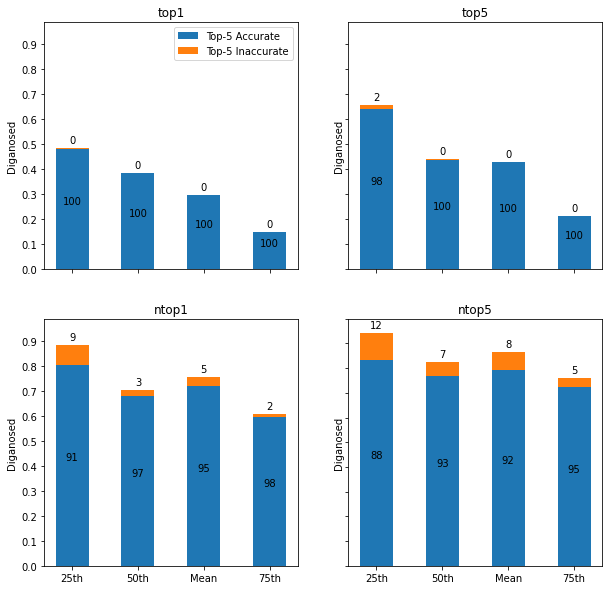

In [34]:
# plot mlp
title_maps = ["Top-1", "Top-5", "Non Top-1", "Non Top-5"]
labels = ['25th', '50th', 'Mean', '75th']
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for idx in range(len(mlp_processed)):
    
    pct, acc, _ = mlp_processed[idx]
    
    pct = np.array(pct)
    acc = np.array(acc)
    
    corr = pct * acc
    wrong = pct - corr
    
    jdx = idx // 2
    kdx = idx % 2
    
    ax = axes[jdx, kdx]
    
    p1 = ax.bar(x, corr, width)
    p2 = ax.bar(x, wrong, width, bottom=corr)
    
    height_offset = [rect.get_height() for rect in p1]

    autolabel(ax, p1, acc)
    autolabel(ax, p2, 1 - acc, height_offset)
    
    
    ax.set_ylabel('Diganosed')
    ax.set_title(keys[idx])
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    if idx == 0:
        ax.legend((p1[0], p2[0]), ('Top-5 Accurate', 'Top-5 Inaccurate'))

fig.set_size_inches(10, 10)
fig.savefig(os.path.join(fig_dir, "mlp_threshold.pdf"))

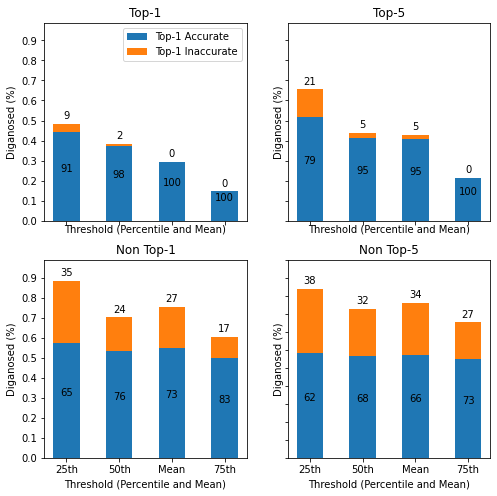

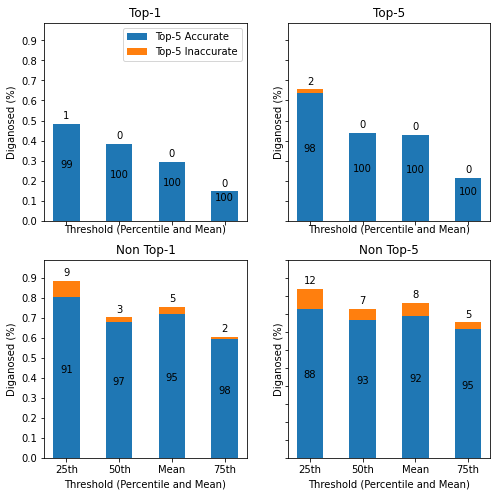

In [46]:
# plot nb
title_maps = ["Top-1", "Top-5", "Non Top-1", "Non Top-5"]
labels = ['25th', '50th', 'Mean', '75th']
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig1, axes1 = plt.subplots(2, 2, sharex=True, sharey=True)
fig5, axes5 = plt.subplots(2, 2, sharex=True, sharey=True)

for idx in range(len(nb_processed)):
    
    pct, acc5, acc1 = nb_processed[idx]
    
    pct = np.array(pct)
    acc1 = np.array(acc1)
    acc5 = np.array(acc5)
    
    corr5 = pct * acc5
    corr1 = pct * acc1
    
    wrong5 = pct - corr5
    wrong1 = pct - corr1
    
    jdx = idx // 2
    kdx = idx % 2
    
    ax1 = axes1[jdx, kdx]
    ax5 = axes5[jdx, kdx]
    
    p1_1 = ax1.bar(x, corr1, width)
    p1_2 = ax1.bar(x, wrong1, width, bottom=corr1)
    
    p5_1 = ax5.bar(x, corr5, width)
    p5_2 = ax5.bar(x, wrong5, width, bottom=corr5)
    
    height_offset_1 = [rect.get_height() for rect in p1_1]
    height_offset_5 = [rect.get_height() for rect in p5_1]

    autolabel(ax1, p1_1, acc1)
    autolabel(ax5, p5_1, acc5)
    
    autolabel(ax1, p1_2, 1 - acc1, height_offset_1)
    autolabel(ax5, p5_2, 1 - acc5, height_offset_5)
    
    _ax = [ax1, ax5]
    
    legend = [('')]
    for mdx, ax in enumerate(_ax):
        ax.set_ylabel('Diganosed (%)')
        ax.set_xlabel('Threshold (Percentile and Mean)')
        ax.set_title(title_maps[idx])
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.set_yticks(np.arange(0, 1.2, 0.1))
        if idx == 0:
            if mdx == 0:
                ax.legend((p1_1[0], p1_2[0]), ('Top-1 Accurate', 'Top-1 Inaccurate'))
            else:
                ax.legend((p5_1[0], p5_2[0]), ('Top-5 Accurate', 'Top-5 Inaccurate'))

fig1.set_size_inches(8, 8)
fig1.savefig(os.path.join(fig_dir, "nb_threshold_acc.pdf"))
fig1.savefig(os.path.join(fig_dir, "nb_threshold_acc.png"))

fig5.set_size_inches(8, 8)
fig5.savefig(os.path.join(fig_dir, "nb_threshold_top5.pdf"))
fig5.savefig(os.path.join(fig_dir, "nb_threshold_top5.png"))

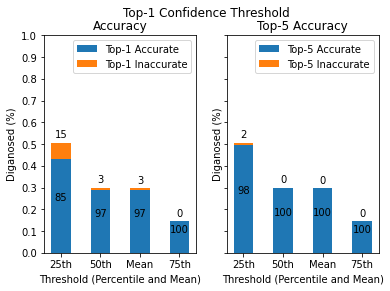

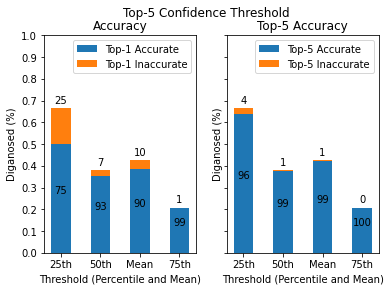

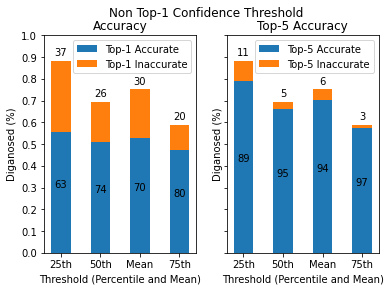

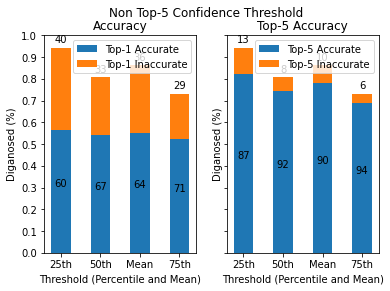

In [51]:
# plot rf
keys = list(rf_threshold.keys())
title_maps = ["Top-1", "Top-5", "Non Top-1", "Non Top-5"]
combo_maps = ["Accuracy", "Top-5 Accuracy"]
labels = ['25th', '50th', 'Mean', '75th']
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

# fig1, axes1 = plt.subplots(2, 2, sharex=True, sharey=True)
# fig5, axes5 = plt.subplots(2, 2, sharex=True, sharey=True)

for idx in range(len(rf_processed)):
    
    pct, acc5, acc1 = rf_processed[idx]
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
    
    ax1 = axes[0]
    ax5 = axes[1]
    
    pct = np.array(pct)
    acc1 = np.array(acc1)
    acc5 = np.array(acc5)
    
    corr5 = pct * acc5
    corr1 = pct * acc1
    
    wrong5 = pct - corr5
    wrong1 = pct - corr1    
    
    p1_1 = ax1.bar(x, corr1, width)
    p1_2 = ax1.bar(x, wrong1, width, bottom=corr1)
    
    p5_1 = ax5.bar(x, corr5, width)
    p5_2 = ax5.bar(x, wrong5, width, bottom=corr5)
    
    height_offset_1 = [rect.get_height() for rect in p1_1]
    height_offset_5 = [rect.get_height() for rect in p5_1]

    autolabel(ax1, p1_1, acc1)
    autolabel(ax5, p5_1, acc5)
    
    autolabel(ax1, p1_2, 1 - acc1, height_offset_1)
    autolabel(ax5, p5_2, 1 - acc5, height_offset_5)
    
    _ax = [ax1, ax5]
    
    legend = [('')]
    for mdx, ax in enumerate(_ax):
        ax.set_ylabel('Diganosed (%)')
        ax.set_xlabel('Threshold (Percentile and Mean)')
        ax.set_title(combo_maps[mdx])
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.set_yticks(np.arange(0, 1.1, 0.1))
        if mdx == 0:
            ax.legend((p1_1[0], p1_2[0]), ('Top-1 Accurate', 'Top-1 Inaccurate'))
        else:
            ax.legend((p5_1[0], p5_2[0]), ('Top-5 Accurate', 'Top-5 Inaccurate'))
    
    fig.suptitle('%s Confidence Threshold' % title_maps[idx])
    fig.savefig(os.path.join(fig_dir, "rf_threshold_%s.pdf" % keys[idx]))
    fig.savefig(os.path.join(fig_dir, "rf_threshold_%s.png" % keys[idx]))

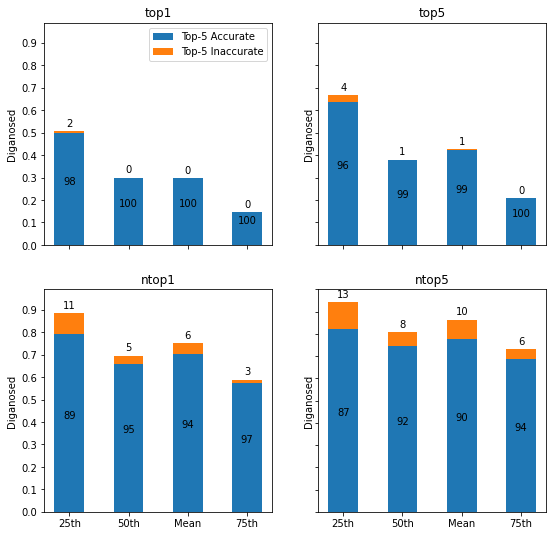

In [41]:
# plot rf
title_maps = ["Top-1", "Top-5", "Non Top-1", "Non Top-5"]
labels = ['25th', '50th', 'Mean', '75th']
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for idx in range(len(rf_processed)):
    
    pct, acc, _ = rf_processed[idx]
    
    pct = np.array(pct)
    acc = np.array(acc)
    
    corr = pct * acc
    wrong = pct - corr
    
    jdx = idx // 2
    kdx = idx % 2
    
    ax = axes[jdx, kdx]
    
    p1 = ax.bar(x, corr, width)
    p2 = ax.bar(x, wrong, width, bottom=corr)
    
    height_offset = [rect.get_height() for rect in p1]

    autolabel(ax, p1, acc)
    autolabel(ax, p2, 1 - acc, height_offset)
    
    
    ax.set_ylabel('Diganosed')
    ax.set_title(keys[idx])
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    if idx == 0:
        ax.legend((p1[0], p2[0]), ('Top-5 Accurate', 'Top-5 Inaccurate'))

fig.set_size_inches(9, 9)
fig.savefig(os.path.join(fig_dir, "rf_threshold.pdf"))